In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RLC critico.csv'
fr = pd.read_csv(FILE)

In [2]:
t = np.array(fr['t (us)']) * 10**-6
V = np.array(fr['V (Volt)'])
sigmaV = 0.04 / np.sqrt(12)

C = 0.000000099
R = 1760 #ohm 1%
L = 0.082

R_L = 58.5 #ohm 1%
Vg = 4 #Volt

w2 = 1 / (L*C)
γ = (R+R_L) / (2*L)

In [3]:
def VR(t,A,γ):
    return A * t * np.exp(-γ*t)

i = Interpolazione(t,V,VR,sigmaV,p0=[Vg,γ])
print(i)

   
Parameters: [152835.76297402  10512.07000535] 
Sigma parameters: [743.29628032  35.32577173]

sigmaY: 0.011547005383792516

chiquadro ridotto: 40.48
df: 73
pvalue: 99.9%
covariance matrix: [[523416.14244648  21769.75273918]
 [ 21769.75273918   1182.24234332]]    



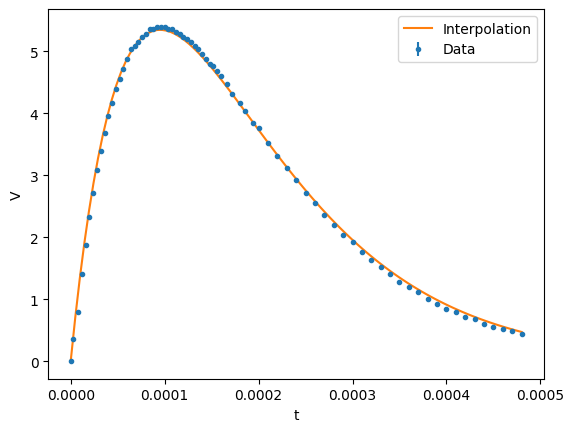

In [5]:
plt.errorbar(t, V, yerr=sigmaV, fmt='.', label='Data')
plt.plot(i.x_best, i.y_best, label='Interpolation')
plt.xlabel('t')
plt.ylabel('V')
plt.legend()
plt.show()